In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np

In [2]:
#read csv and make the main dataframe
outbreak_df = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak_df.head()

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,0.0,6.0,0.0,6
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,1.0,20.0,0.0,20
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,0.0,18.0,0.0,18
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,1.0,95.0,2.0,95


In [13]:
state_et = outbreak_df.groupby(["State"]).sum(numeric_only=True)
state_et = state_et[["Illnesses","Hospitalizations","Deaths"]].sort_values(by="Illnesses", ascending=False)
state_et_highest = state_et.head(5)
state_et_highest

,Illnesses,Hospitalizations,Deaths
State,,,
Multistate,7758,1752.0,31.0
Wisconsin,4377,140.0,12.0
Illinois,4085,129.0,3.0
Colorado,3299,56.0,1.0
Minnesota,2733,105.0,10.0


In [14]:
state_et_lowest = state_et.sort_values(by="Illnesses", ascending=True).head(5)
state_et_lowest

,Illnesses,Hospitalizations,Deaths
State,,,
Mississippi,10,0.0,0.0
North Dakota,19,2.0,0.0
South Dakota,62,4.0,0.0
Alaska,70,4.0,0.0
Hawaii,83,7.0,0.0


In [15]:
state_et_high_hosp = state_et.sort_values(by="Hospitalizations", ascending=False).head(5)
state_et_high_hosp

,Illnesses,Hospitalizations,Deaths
State,,,
Multistate,7758,1752.0,31.0
Wisconsin,4377,140.0,12.0
Illinois,4085,129.0,3.0
Minnesota,2733,105.0,10.0
Massachusetts,2012,86.0,1.0


In [16]:
state_et_low_hosp = state_et.sort_values(by="Hospitalizations", ascending=True).head(5)
state_et_low_hosp

,Illnesses,Hospitalizations,Deaths
State,,,
Mississippi,10,0.0,0.0
Oklahoma,373,1.0,0.0
Nevada,274,1.0,0.0
North Dakota,19,2.0,0.0
Vermont,129,2.0,0.0


In [17]:
state_et_high_death = state_et.sort_values(by="Deaths", ascending=False).head(5)
state_et_high_death

,Illnesses,Hospitalizations,Deaths
State,,,
Multistate,7758,1752.0,31.0
Wisconsin,4377,140.0,12.0
Minnesota,2733,105.0,10.0
Connecticut,1589,44.0,7.0
Florida,464,80.0,7.0


In [18]:
state_et_low_death = state_et.sort_values(by="Deaths", ascending=True).head(5)
state_et_low_death

,Illnesses,Hospitalizations,Deaths
State,,,
Mississippi,10,0.0,0.0
Tennessee,521,18.0,0.0
Idaho,459,19.0,0.0
Indiana,841,29.0,0.0
California,417,16.0,0.0


In [3]:
#show only relevant information
et_hosp_death = outbreak_df.groupby(["Etiology"]).sum(numeric_only=True)
et_hosp_death = et_hosp_death[["Illnesses","Hospitalizations","Deaths"]]
et_hosp_death = et_hosp_death.rename(columns={"Illnesses":"Total Reported Cases", "Hospitalizations":"Total Hospitalizations", "Deaths":"Total Deaths"})
et_hosp_death["Hospitalization %"] = (et_hosp_death["Total Hospitalizations"]/et_hosp_death["Total Reported Cases"])*100
et_hosp_death["Death %"] = (et_hosp_death["Total Deaths"]/et_hosp_death["Total Reported Cases"])*100
et_hosp_death["% Death to Hospitalization"] = (et_hosp_death["Total Deaths"]/et_hosp_death["Total Hospitalizations"])*100
et_hosp_death["% Death to Hospitalization"] = et_hosp_death["% Death to Hospitalization"].fillna(0)
et_hosp_death = et_hosp_death.sort_values(by="% Death to Hospitalization")
et_hosp_death["% Death to Hospitalization"].replace([np.inf, -np.inf], 0, inplace=True)
et_hosp_death.head()


,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Adenovirus unknown,21,0.0,0.0,0.000000,0.0,0.0
Norovirus unknown; Norovirus Genogroup II,52,1.0,0.0,1.923077,0.0,0.0
Norovirus unknown; Norovirus Genogroup II; Clostridium difficile,38,0.0,0.0,0.000000,0.0,0.0
Norovirus unknown; Salmonella enterica,80,0.0,0.0,0.000000,0.0,0.0
Norovirus unknown; Sapovirus unknown,22,0.0,0.0,0.000000,0.0,0.0


In [4]:
reported_leading_count = et_hosp_death.sort_values(by= "Total Reported Cases", ascending= False)
reported_leading_count = reported_leading_count.head(5)
reported_leading_count

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Norovirus unknown,17424,355.0,22.0,2.037420,0.126263,6.197183
Norovirus Genogroup II,11536,189.0,19.0,1.638350,0.164702,10.052910
Salmonella enterica,8382,1707.0,11.0,20.365068,0.131234,0.644405
Norovirus,7458,96.0,1.0,1.287208,0.013408,1.041667
Norovirus Genogroup II; Norovirus Genogroup II,1141,65.0,0.0,5.696757,0.000000,0.000000


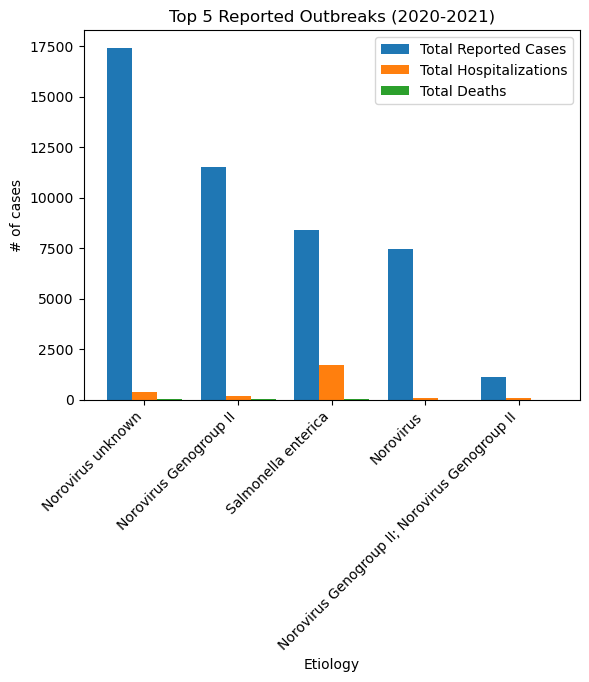

In [5]:
reported_leading_count.plot(  kind="bar", y=["Total Reported Cases","Total Hospitalizations","Total Deaths"],
                        xlabel="Etiology", ylabel = "# of cases", width = 0.8,
                        title = "Top 5 Reported Outbreaks (2020-2021)")
plt.xticks(rotation = 45, ha="right")
plt.savefig("DH_output/top5_reported_outbreaks_w_hospitalization_death_bar.png")
plt.show()

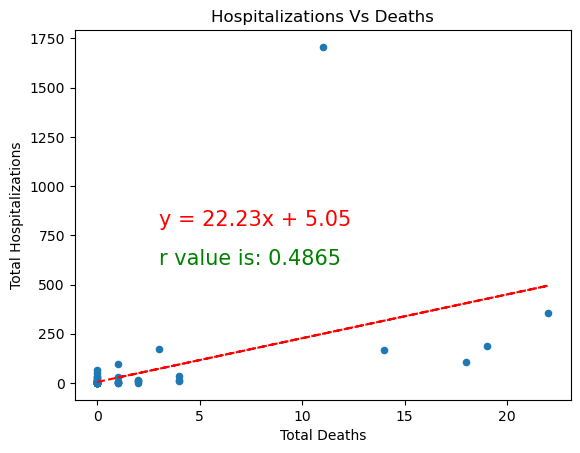

In [45]:
from scipy import stats

et_hosp_death.plot(kind="scatter",x = "Total Deaths", y= "Total Hospitalizations", title="Hospitalizations Vs Deaths")
slope, int, r, p, std_err = stats.linregress(et_hosp_death["Total Deaths"],et_hosp_death["Total Hospitalizations"])
lin_reg = (slope * et_hosp_death["Total Deaths"]) + int
plt.plot(et_hosp_death["Total Deaths"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(3,800),fontsize=15, color = "red")
plt.annotate(f"r value is: {round(r,4)}",(3,600),fontsize=15, color = "green")
plt.savefig("DH_output/hospitalizations_v_death_scatter.png")

plt.show()

In [6]:
hosp_leading_count = et_hosp_death.sort_values(by= "Total Hospitalizations", ascending= False)
hosp_leading_count = hosp_leading_count.head(5)
hosp_leading_count

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Salmonella enterica,8382,1707.0,11.0,20.365068,0.131234,0.644405
Norovirus unknown,17424,355.0,22.0,2.037420,0.126263,6.197183
Norovirus Genogroup II,11536,189.0,19.0,1.638350,0.164702,10.052910
"Escherichia coli, Shiga toxin-producing",704,172.0,3.0,24.431818,0.426136,1.744186
Legionella pneumophila,210,168.0,14.0,80.000000,6.666667,8.333333


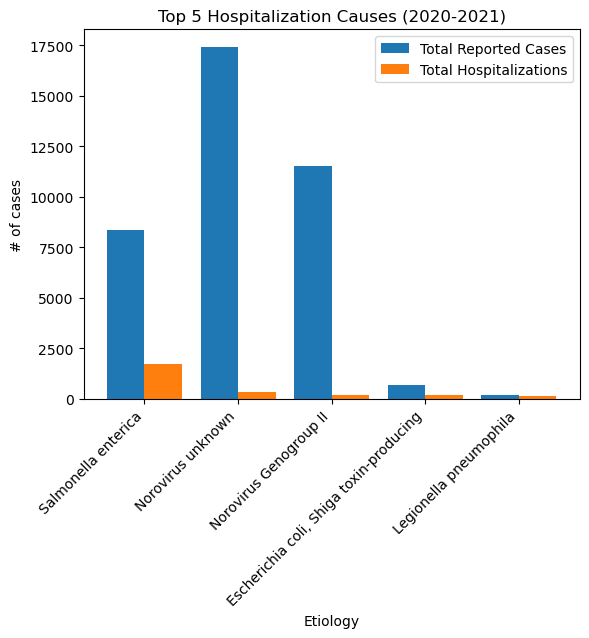

In [7]:
hosp_leading_count.plot(  kind="bar", y=["Total Reported Cases","Total Hospitalizations"],
                        xlabel="Etiology", ylabel = "# of cases", width = 0.8,
                        title = "Top 5 Hospitalization Causes (2020-2021)")
plt.xticks(rotation = 45, ha="right")
plt.savefig("DH_output/top5_hospitalization_causes_perCount_w_totalReported_bar.png")
plt.show()

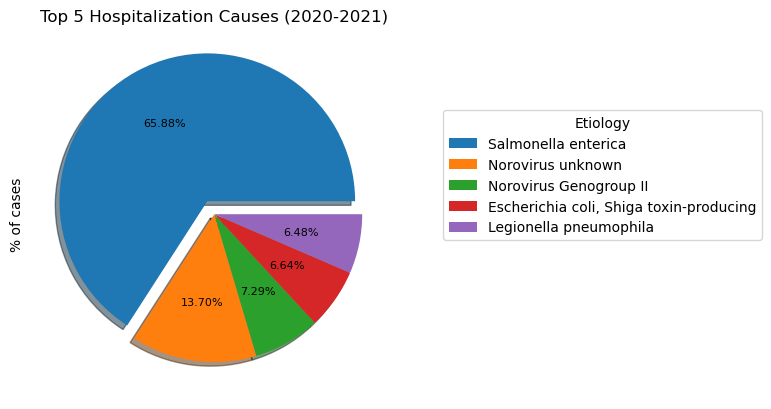

In [8]:
hosp_leading_count  = pd.DataFrame(hosp_leading_count["Total Hospitalizations"].nlargest(5))
hosp_leading_count
explode = (.1,0,0,0,0)
hosp_leading_count.plot( kind="pie", y="Total Hospitalizations", title = "Top 5 Hospitalization Causes (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0, shadow = True)
plt.legend(loc="upper right", labels = hosp_leading_count.index, bbox_to_anchor=(2,.8),title="Etiology")
plt.ylabel("% of cases")
plt.savefig("DH_output/top5_hospitalization_causes_perCount_pie")
plt.show()

In [9]:
hosp_perc_leading_count = et_hosp_death.sort_values(by= "Hospitalization %", ascending= False)
hosp_perc_leading_count = hosp_perc_leading_count.head(5)
hosp_perc_leading_count

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Legionella pneumophila; Legionella anisa,3,3.0,1.0,100.000000,33.333333,33.333333
"Campylobacter coli; Escherichia coli, Enterotoxigenic; Salmonella enterica; Cryptosporidium unknown; Escherichia coli, Enteropathogenic",2,2.0,0.0,100.000000,0.000000,0.000000
Clostridium botulinum,12,12.0,2.0,100.000000,16.666667,16.666667
Legionella unknown,15,15.0,2.0,100.000000,13.333333,13.333333
Listeria monocytogenes,115,105.0,18.0,91.304348,15.652174,17.142857


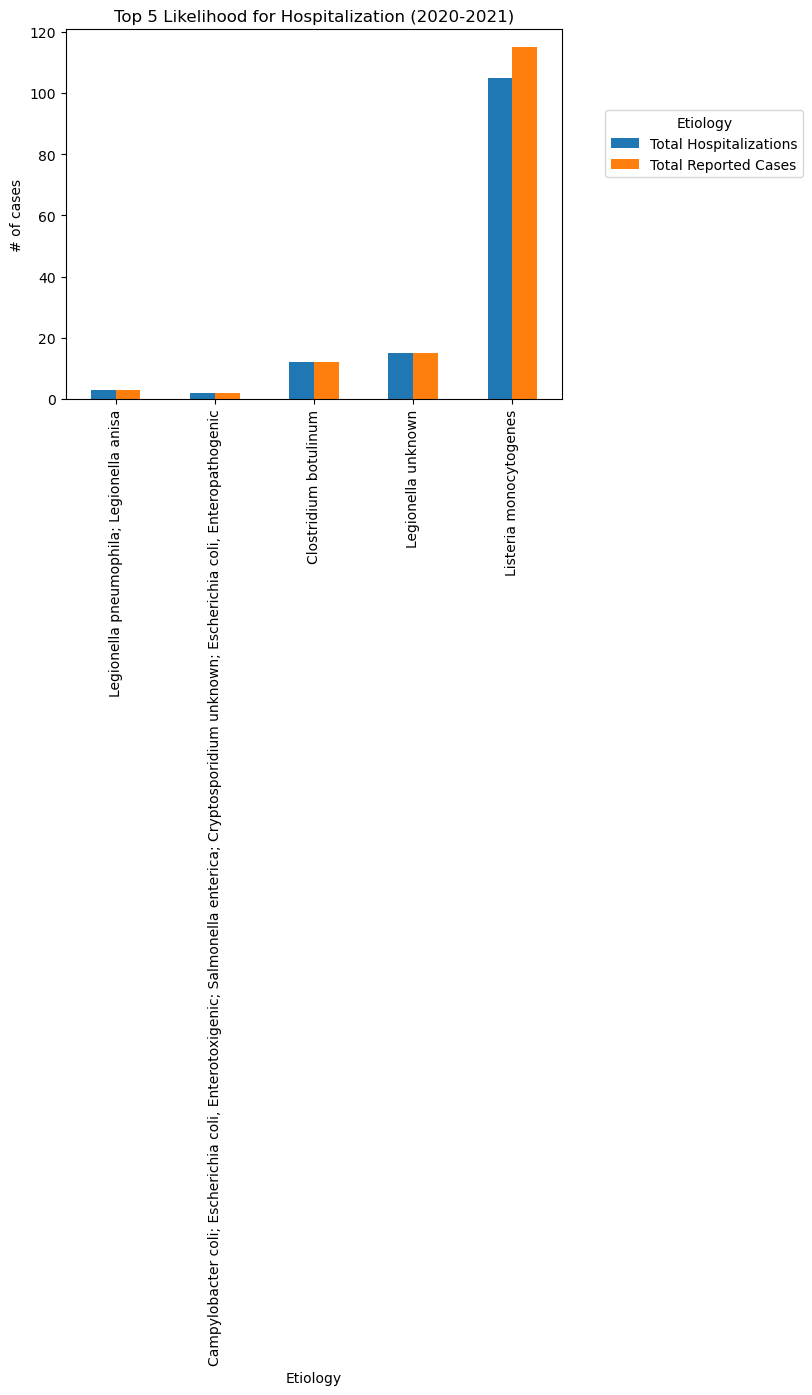

In [10]:

hosp_perc_leading_count.plot( kind="bar", y=["Total Hospitalizations","Total Reported Cases"], title = "Top 5 Likelihood for Hospitalization (2020-2021)", 
                         legend = False,
                         )
plt.legend(loc="upper right", bbox_to_anchor=(1.5,.8),title="Etiology")
plt.ylabel("# of cases")

plt.savefig("DH_output/top5_hospitalization_likelihood_bar.png")
plt.show()

In [11]:
death_leading_count = et_hosp_death.sort_values(by= "Total Deaths", ascending= False)
death_leading_count = death_leading_count.head(5)
death_leading_count

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Norovirus unknown,17424,355.0,22.0,2.037420,0.126263,6.197183
Norovirus Genogroup II,11536,189.0,19.0,1.638350,0.164702,10.052910
Listeria monocytogenes,115,105.0,18.0,91.304348,15.652174,17.142857
Legionella pneumophila,210,168.0,14.0,80.000000,6.666667,8.333333
Salmonella enterica,8382,1707.0,11.0,20.365068,0.131234,0.644405


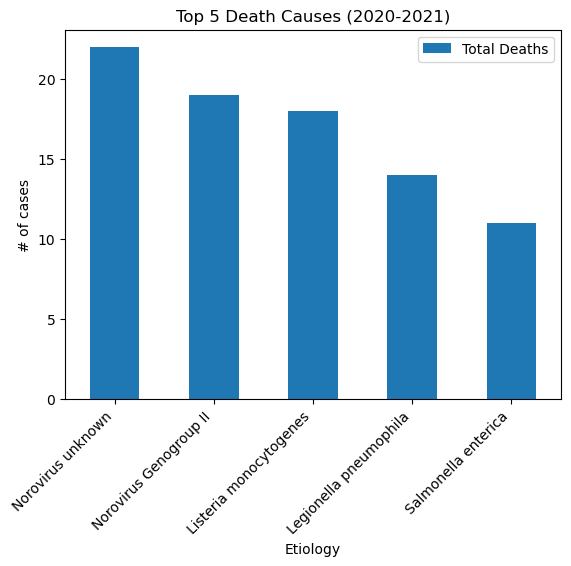

In [12]:
death_leading_count.plot(  kind="bar", y=["Total Deaths"],
                        xlabel="Etiology", ylabel = "# of cases",
                        title = "Top 5 Death Causes (2020-2021)")
plt.xticks(rotation = 45, ha="right")
plt.savefig("DH_output/top5_death_causes_perCount_bar.png")
plt.show()

In [13]:
death_perc_leading_count = et_hosp_death.sort_values(by= "Death %", ascending= False)
death_perc_leading_count = death_perc_leading_count.head(5)
death_perc_leading_count

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Legionella pneumophila; Legionella anisa,3,3.0,1.0,100.000000,33.333333,33.333333
Pseudomonas aeruginosa,23,12.0,4.0,52.173913,17.391304,33.333333
Clostridium botulinum,12,12.0,2.0,100.000000,16.666667,16.666667
Listeria monocytogenes,115,105.0,18.0,91.304348,15.652174,17.142857
Legionella unknown,15,15.0,2.0,100.000000,13.333333,13.333333


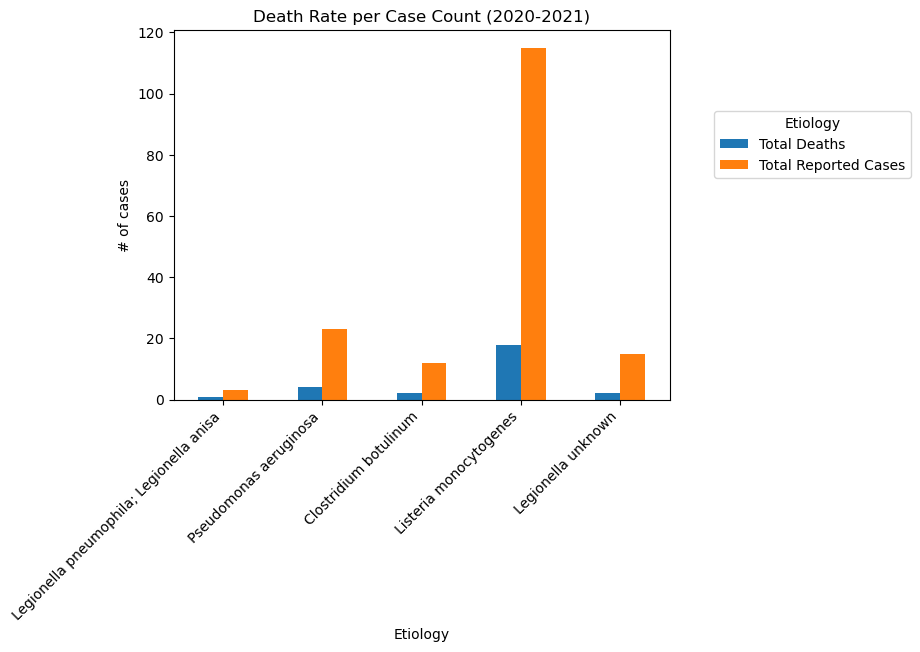

In [14]:
death_perc_leading_count.plot( kind="bar", y=["Total Deaths","Total Reported Cases"], title = "Death Rate per Case Count (2020-2021)", 
                         legend = False)
plt.xticks(rotation=45,ha="right")
plt.legend(loc="upper right", bbox_to_anchor=(1.5,.8),title="Etiology")
plt.ylabel("# of cases")

plt.savefig("DH_output/top5_death_rate_likelihood_bar.png")
plt.show()

In [17]:
et_hosp_death.sort_values(by="Total Reported Cases", ascending= False).head()

,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization
Etiology,,,,,,
Norovirus unknown,17424,355.0,22.0,2.037420,0.126263,6.197183
Norovirus Genogroup II,11536,189.0,19.0,1.638350,0.164702,10.052910
Salmonella enterica,8382,1707.0,11.0,20.365068,0.131234,0.644405
Norovirus,7458,96.0,1.0,1.287208,0.013408,1.041667
Norovirus Genogroup II; Norovirus Genogroup II,1141,65.0,0.0,5.696757,0.000000,0.000000


In [39]:
total_reported_cases = et_hosp_death["Total Reported Cases"].sum()
print(f"Total Reported cases = {total_reported_cases}")

total_hospitalizations = et_hosp_death["Total Hospitalizations"].sum()
print(f"Total Hospitalized cases = {int(total_hospitalizations)}")

total_death = et_hosp_death["Total Deaths"].sum()
print(f"Total Death cases = {int(total_death)}")


total_none_reported_df = et_hosp_death
total_none_reported_df["Total No Reported"] = total_none_reported_df["Total Reported Cases"] - (total_none_reported_df["Total Hospitalizations"]+total_none_reported_df["Total Deaths"])

# total_none_reported_df =  et_hosp_death.loc[(et_hosp_death["Total Hospitalizations"] == 0.0)|(et_hosp_death["Total Deaths"]==0.0)|(et_hosp_death["Total Reported Cases"]==0.0)]
# total_none_reported = (total_none_reported_df["Total Reported Cases"].sum())+(total_none_reported_df["Total Hospitalizations"].sum())+(total_none_reported_df["Total Deaths"].sum())
total_none_reported = total_none_reported_df["Total No Reported"].sum()
print(f"Total cases with no reported hospitalization or death = {total_none_reported}")

total_none_reported_df

Total Reported cases = 55654
Total Hospitalized cases = 3322
Total Death cases = 114
Total cases with no reported hospitalization or death = 52218.0


,Total Reported Cases,Total Hospitalizations,Total Deaths,Hospitalization %,Death %,% Death to Hospitalization,Total No Reported
Etiology,,,,,,,
Adenovirus unknown,21,0.0,0.0,0.000000,0.000000,0.000000,21.0
Norovirus unknown; Norovirus Genogroup II,52,1.0,0.0,1.923077,0.000000,0.000000,51.0
Norovirus unknown; Norovirus Genogroup II; Clostridium difficile,38,0.0,0.0,0.000000,0.000000,0.000000,38.0
Norovirus unknown; Salmonella enterica,80,0.0,0.0,0.000000,0.000000,0.000000,80.0
Norovirus unknown; Sapovirus unknown,22,0.0,0.0,0.000000,0.000000,0.000000,22.0
...,...,...,...,...,...,...,...
Legionella pneumophila; Legionella anisa,3,3.0,1.0,100.000000,33.333333,33.333333,-1.0
Pseudomonas aeruginosa,23,12.0,4.0,52.173913,17.391304,33.333333,7.0
Rotavirus,33,1.0,2.0,3.030303,6.060606,200.000000,30.0
